# AI vs Human art classification
This project is done as part of the Context Aware Security Analytics In Computer Vision 2023/2024 course

Supervised by **Carmen Bisogni**

By **Zakarya Boudraf**, **Mohammed Aziz Khitmi** and **Melissa Ould Braham**

## Now we fit the model on all styles at once

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### listing the training then the testing directories 

In [3]:
top_dir = '../input/Real_AI_SD_LD_Dataset/'

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/train/impressionism
1. ../input/Real_AI_SD_LD_Dataset/train/renaissance
2. ../input/Real_AI_SD_LD_Dataset/train/surrealism
3. ../input/Real_AI_SD_LD_Dataset/train/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/train/baroque
5. ../input/Real_AI_SD_LD_Dataset/train/expressionism
6. ../input/Real_AI_SD_LD_Dataset/train/romanticism
7. ../input/Real_AI_SD_LD_Dataset/train/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/train/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/train/realism

Train directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/train/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Data

In [4]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/test/impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/renaissance
2. ../input/Real_AI_SD_LD_Dataset/test/surrealism
3. ../input/Real_AI_SD_LD_Dataset/test/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/test/baroque
5. ../input/Real_AI_SD_LD_Dataset/test/expressionism
6. ../input/Real_AI_SD_LD_Dataset/test/romanticism
7. ../input/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/test/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_bar

# Ranking the styles from easiest to hardest to classify 
1. Realism
1. Renaissance
1. Ukiyo-e
1. Baroque
1. Post-Impressionism
1. Impressionism
1. Romanticism
1. Expressionism
1. Surrealism
1. Art Nouveau

# Model for Classifying AI-Generated images on all styles
## First we list the training data

In [5]:
# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/test/impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/renaissance
2. ../input/Real_AI_SD_LD_Dataset/test/surrealism
3. ../input/Real_AI_SD_LD_Dataset/test/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/test/baroque
5. ../input/Real_AI_SD_LD_Dataset/test/expressionism
6. ../input/Real_AI_SD_LD_Dataset/test/romanticism
7. ../input/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/test/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_bar

# Labeling the training data

In [6]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [7]:
train_data

,filepath,label
0,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
1,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
2,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
3,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
4,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
...,...,...
155010,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155011,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155012,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155013,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI


### We split the training data into training and validation subsets (80/20)

In [8]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(train_data, test_size=0.2)

In [9]:
train_data

,filepath,label
94028,../input/Real_AI_SD_LD_Dataset/train/AI_SD_pos...,AI
78734,../input/Real_AI_SD_LD_Dataset/train/AI_LD_rom...,AI
7018,../input/Real_AI_SD_LD_Dataset/train/renaissan...,human
105225,../input/Real_AI_SD_LD_Dataset/train/AI_LD_ren...,AI
149275,../input/Real_AI_SD_LD_Dataset/train/AI_SD_sur...,AI
...,...,...
82586,../input/Real_AI_SD_LD_Dataset/train/AI_LD_bar...,AI
118298,../input/Real_AI_SD_LD_Dataset/train/AI_SD_rea...,AI
54873,../input/Real_AI_SD_LD_Dataset/train/AI_SD_imp...,AI
92158,../input/Real_AI_SD_LD_Dataset/train/AI_SD_pos...,AI


In [10]:
validation_data

,filepath,label
102651,../input/Real_AI_SD_LD_Dataset/train/AI_LD_ren...,AI
116090,../input/Real_AI_SD_LD_Dataset/train/AI_SD_rom...,AI
66238,../input/Real_AI_SD_LD_Dataset/train/AI_LD_sur...,AI
109721,../input/Real_AI_SD_LD_Dataset/train/AI_SD_ren...,AI
150216,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
...,...,...
138378,../input/Real_AI_SD_LD_Dataset/train/AI_LD_rea...,AI
143347,../input/Real_AI_SD_LD_Dataset/train/AI_SD_art...,AI
134068,../input/Real_AI_SD_LD_Dataset/train/AI_LD_rea...,AI
89057,../input/Real_AI_SD_LD_Dataset/train/AI_LD_exp...,AI


In [11]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       83965
human    40047
Name: count, dtype: int64


In [12]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [13]:
test_data

,filepath,label
0,../input/Real_AI_SD_LD_Dataset/test/impression...,human
1,../input/Real_AI_SD_LD_Dataset/test/impression...,human
2,../input/Real_AI_SD_LD_Dataset/test/impression...,human
3,../input/Real_AI_SD_LD_Dataset/test/impression...,human
4,../input/Real_AI_SD_LD_Dataset/test/impression...,human
...,...,...
29995,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29996,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29997,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29998,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI


In [14]:
# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


### Creating the Training and Validation sets

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 124012 validated image filenames belonging to 2 classes.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

validation_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
validation_dataset = validation_generator.flow_from_dataframe(
    dataframe=validation_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',  
    shuffle=True
)

Found 31003 validated image filenames belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

### Creating the Test set

In [18]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

### Building the neural network

In [ ]:
from keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D,
    GlobalAveragePooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Concatenate,
)
from keras.models import Model

def dense_block(x, growth_rate, filters):
  """
  Defines a dense convolutional block (DCB) for DenseNet.

  Args:
      x: Input tensor.
      growth_rate: Growth rate for the number of feature maps.
      filters: Total number of filters for the block.

  Returns:
      Output tensor from the DCB.
  """
  for _ in range(filters // growth_rate):
    # Batch normalization, ReLU, 1x1 convolution (bottleneck)
    bn_x = BatchNormalization()(x)
    relu_x = Activation("relu")(bn_x)
    bottleneck = Conv2D(filters=growth_rate, kernel_size=(1, 1), padding="same")(relu_x)

    # 3x3 convolution
    conv_x = BatchNormalization()(bottleneck)
    relu_x = Activation("relu")(conv_x)
    conv_x = Conv2D(filters=growth_rate, kernel_size=(3, 3), padding="same")(relu_x)

    # Concatenate with input
    x = Concatenate()([x, conv_x])

  return x

# Define model inputs
inputs = Input(shape=(32, 32, 3))

# Initial convolution
x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)  # Optional pooling

# Dense blocks (adjust growth rate, filters, and number of blocks as needed)
growth_rate = 16
filters = 64
for _ in range(4):  # Example: 4 dense blocks in the first stage
  x = dense_block(x, growth_rate, filters)
  filters += growth_rate  # Increase filters for each block

# Optional transition block (replace with AveragePooling2D if needed)
# x = transition_block(x, filters)  # Define transition_block if desired

# Classification head
x = GlobalAveragePooling2D()(x)  # Replace with AveragePooling2D for spatial info
x = Flatten()(x)
x = Dense(units=32, activation="relu")(x)  # Adjust units
x = Dense(units=16, activation="relu")(x)  # Adjust units
outputs = Dense(units=2, activation="softmax")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()


Model: "functional_3"

 Trainable params: 167,474 (654.20 KB)

 Non-trainable params: 11,040 (43.12 KB)

### We fit the model to the data (we implement checkpointing to save the weights of the maximum val_acc model)

In [21]:
os.makedirs('../working/models')

FileExistsError: [Errno 17] File exists: '../working/models'

In [22]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [23]:
import time

# Initial epoch count
epochs = 15

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1821s 918ms/step - accuracy: 0.8707 - loss: 0.3005 - val_accuracy: 0.8346 - val_loss: 0.3609
Epoch 2/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1142s 588ms/step - accuracy: 0.9184 - loss: 0.2026 - val_accuracy: 0.8576 - val_loss: 0.3269
Epoch 3/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1085s 559ms/step - accuracy: 0.9293 - loss: 0.1767 - val_accuracy: 0.8591 - val_loss: 0.3063
Epoch 4/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1222s 629ms/step - accuracy: 0.9352 - loss: 0.1618 - val_accuracy: 0.8883 - val_loss: 0.2603
Epoch 5/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 970s 499ms/step - accuracy: 0.9418 - loss: 0.1467 - val_accuracy: 0.9311 - val_loss: 0.1707
Epoch 6/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 844s 435ms/step - accuracy: 0.9464 - loss: 0.1371 - val_accuracy: 0.9391 - val_loss: 0.1587
Epoch 7/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 838s 431ms/step - accuracy: 0.9503 - loss: 0.1273 - val_accuracy: 0.9281 - val_loss: 0.1775
Epoch 8/15
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 840s 432ms/step - accuracy:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1938/1938 ━━━━━━━━━━━━━━━━━━━━ 763s 393ms/step - accuracy: 0.9711 - loss: 0.0747 - val_accuracy: 0.9402 - val_loss: 0.1629
Total training time so far: 14334.53 seconds


### Evaluating the network

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

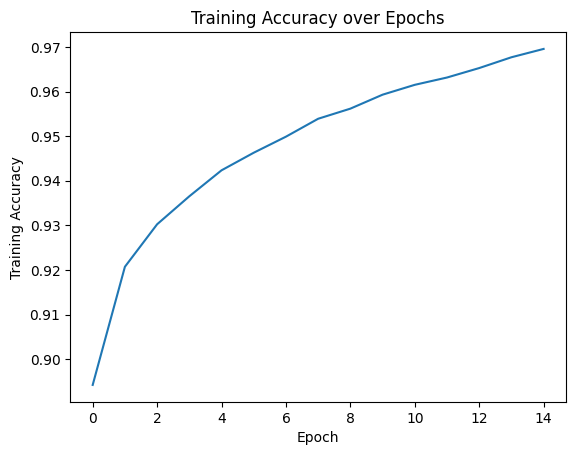

In [36]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

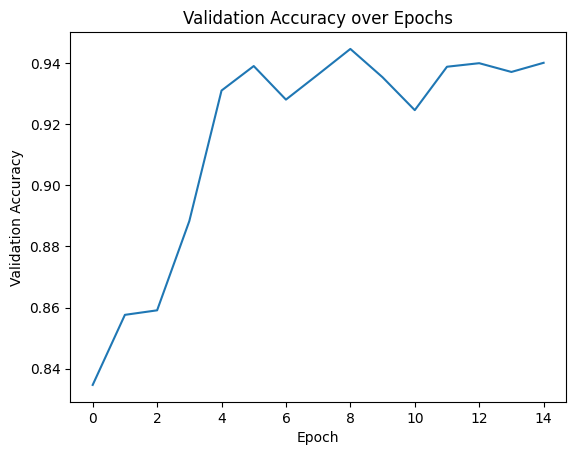

In [37]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

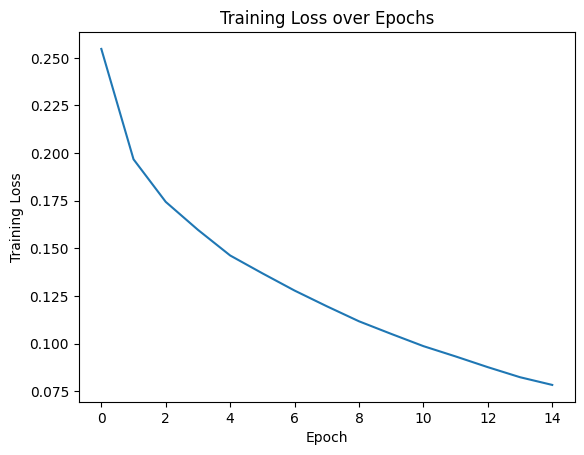

In [38]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

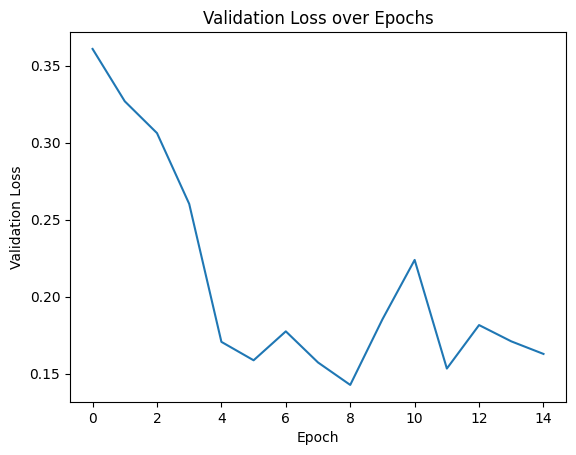

In [39]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [29]:
# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

In [30]:
predictions = model.predict(test_dataset)
predictions

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 401s 13ms/step


array([[9.9501856e-05, 9.9990046e-01],
       [2.2289439e-01, 7.7710563e-01],
       [2.0002311e-10, 1.0000000e+00],
       ...,
       [9.9999964e-01, 3.4311836e-07],
       [9.9766868e-01, 2.3313421e-03],
       [9.9998975e-01, 1.0225616e-05]], dtype=float32)

In [31]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [32]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     20000
           1       0.95      0.88      0.91     10000

    accuracy                           0.94     30000
   macro avg       0.94      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000



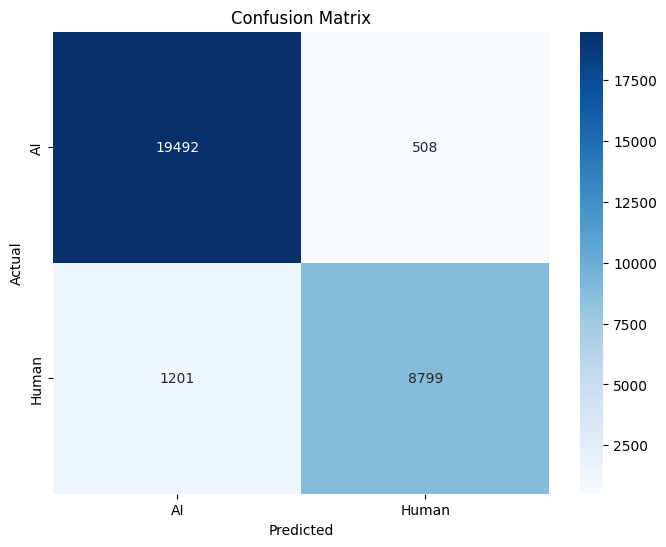

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()

### Suggested solutions
Training for too long can cause overfitting, while training for too short a time leads to underfitting. 

We suggest implementing Early Stopping as a solution, Early stopping helps prevent this by allowing you to train for a flexible amount of time based on when the model's performance on a separate validation dataset plateaus.


In [21]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model_2 = Sequential()
model_2.add(Conv2D(filters = 512, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 32, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
# MLP
# adding the first hidden layer 
model_2.add(Dense(units = 32, activation = 'relu', input_dim = 64))

# adding the second hidden layer 
model_2.add(Dense(units = 16, activation = 'relu'))

# adding the output layer 
model_2.add(Dense(units = 2, activation = 'softmax')) 

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )  

model_2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,874 (2.46 MB)

 Trainable params: 645,874 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model_2.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [ ]:
import time

# Initial epoch count
epochs = 30

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model_2.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1893s 973ms/step - accuracy: 0.8053 - loss: 0.4128 - val_accuracy: 0.8791 - val_loss: 0.2835
Epoch 2/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1865s 961ms/step - accuracy: 0.8928 - loss: 0.2565 - val_accuracy: 0.9142 - val_loss: 0.2136
Epoch 3/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1927s 993ms/step - accuracy: 0.9143 - loss: 0.2117 - val_accuracy: 0.9125 - val_loss: 0.2230
Epoch 4/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1872s 957ms/step - accuracy: 0.9265 - loss: 0.1833 - val_accuracy: 0.9248 - val_loss: 0.1932
Epoch 5/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1917s 975ms/step - accuracy: 0.9329 - loss: 0.1692 - val_accuracy: 0.9295 - val_loss: 0.1759
Epoch 6/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1898s 978ms/step - accuracy: 0.9381 - loss: 0.1539 - val_accuracy: 0.9334 - val_loss: 0.1703
Epoch 7/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1915s 963ms/step - accuracy: 0.9442 - loss: 0.1412 - val_accuracy: 0.9339 - val_loss: 0.1712
Epoch 8/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1887s 967ms/step - accur

In [19]:
history.history.keys()

NameError: name 'history' is not defined

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

In [ ]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [22]:
# The model weights (that are considered the best) can be loaded as -
model_2.load_weights("/kaggle/working/models/checkpoint.model_2.keras")

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [23]:
predictions = model_2.predict(test_dataset)
predictions

    1/30000 ━━━━━━━━━━━━━━━━━━━━ 1:57:49 236ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30000/30000 ━━━━━━━━━━━━━━━━━━━━ 310s 10ms/step


array([[3.3433881e-04, 9.9966562e-01],
       [1.4557776e-01, 8.5442221e-01],
       [7.3669941e-07, 9.9999928e-01],
       ...,
       [1.0000000e+00, 5.8309690e-12],
       [9.9770039e-01, 2.2996310e-03],
       [9.9873728e-01, 1.2627925e-03]], dtype=float32)

In [24]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [25]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     20000
           1       0.91      0.91      0.91     10000

    accuracy                           0.94     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000



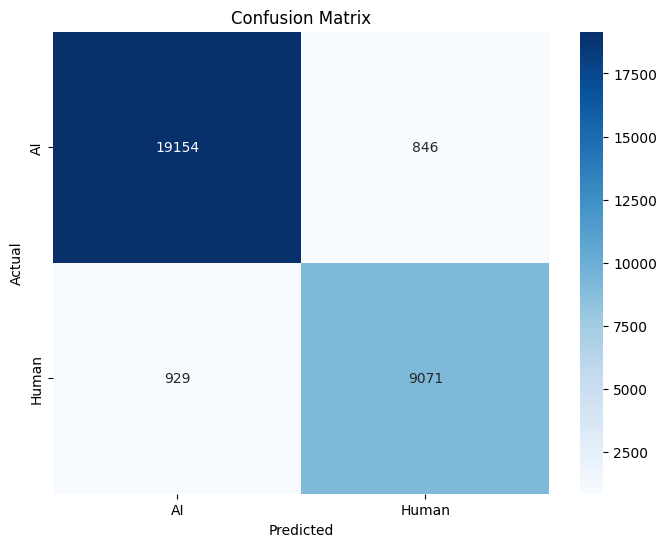

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()